## 선형대수학 스터디
**작성자:** 구재영 \
**교재명:** 개발자를 위한 실전 선형대수학 \
**CH5 행렬, 파트 2:** 행렬의 확장 개념

### 연습문제 5-3

In [1]:
import numpy as np

In [2]:
np.random.seed(42)

In [3]:
A = np.random.randn(10,10)
A

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
        -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004],
       [-0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
        -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
         0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375],
       [-0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
        -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124],
       [ 0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
        -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016],
       [ 0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
         0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513],
       [-0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
         1.35624003, -0.07201012,  1.0035329 

In [4]:
trace_n = np.sqrt(np.sum(np.diag(A.T@A)))
euclid_n = np.sqrt(np.sum(A**2))

print(trace_n)
print(euclid_n)

9.095637931826113
9.095637931826113


In [5]:
trace_n == euclid_n

True

### 연습문제 5-4

In [6]:
# Euclidean Norm
euclid_n

9.095637931826113

In [7]:
move_ratios = np.linspace(0, 1, 30)

norm_changes = []
corr = []
frob_dist = []

for ratio in move_ratios:
    
    # (1) Shift the matrix by a proportion of its norm
    shiftMat = A + ratio * euclid_n * np.random.randn(10, 10)
    
    # (2) Compute the change in norm (as a percentage)
    new_frobenius_norm = np.sqrt(np.sum(shiftMat**2))
    norm_change_percentage = (new_frobenius_norm - euclid_n) / euclid_n * 100
    norm_changes.append(norm_change_percentage)
    
    # (3) Calculate the Frobenius distance between the original and shifted matrices
    frobenius_distance = np.sqrt(np.sum((A - shiftMat)**2))
    frob_dist.append(frobenius_distance)
    
    # (4) Calculate the correlation coefficient between the flattened matrices
    original_flat = A.flatten()
    shifted_flat = shiftMat.flatten()
    correlation = np.corrcoef(original_flat, shifted_flat)[0, 1]
    corr.append(correlation)

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

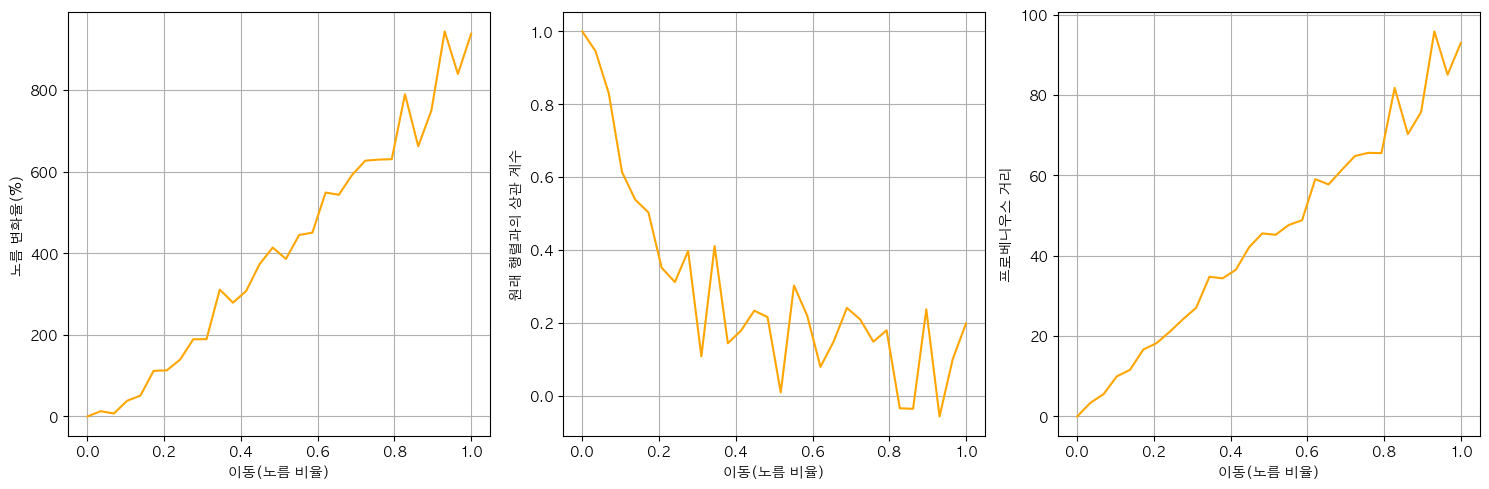

In [9]:
# Plot the results
plt.figure(figsize=(15, 5))

# Subplot 1: Norm change percentage
plt.subplot(1, 3, 1)
plt.plot(move_ratios, norm_changes, color='orange')
plt.xlabel('이동(노름 비율)')
plt.ylabel('노름 변화율(%)')
plt.grid(True)

# Subplot 2: Correlation coefficient
plt.subplot(1, 3, 2)
plt.plot(move_ratios, corr, color='orange')
plt.xlabel('이동(노름 비율)')
plt.ylabel('원래 행렬과의 상관 계수')
plt.grid(True)

# Subplot 3: Frobenius distance
plt.subplot(1, 3, 3)
plt.plot(move_ratios, frob_dist, color='orange')
plt.xlabel('이동(노름 비율)')
plt.ylabel('프로베니우스 거리')
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()

### 연습문제 5-5

In [10]:
M = 5
N = 7
r = 4

A = np.random.randn(M, r)
B = np.random.randn(r, N)

C = np.dot(A, B)

print(f"Generated matrix C has rank: {np.linalg.matrix_rank(C)} (Expected: {r})")

Generated matrix C has rank: 4 (Expected: 4)


What if we set the condition of $r>\min{M,N}$?

In [11]:
M2 = 5
N2 = 7
r2 = 6

A2 = np.random.randn(M2, r2)
B2 = np.random.randn(r2, N2)

C2 = np.dot(A2, B2)

print(f"Generated matrix C2 has rank: {np.linalg.matrix_rank(C2)} (Expected: {r2})")

Generated matrix C2 has rank: 5 (Expected: 6)


### 연습문제 5-6

In [12]:
# rank=0
A = np.diag([1, 0, 0])
B = np.diag([-1, 0, 0])
C = A + B

rank_A = np.linalg.matrix_rank(A)
rank_B = np.linalg.matrix_rank(B)
rank_C = np.linalg.matrix_rank(C)

print(f"Rank(A) = {rank_A}, Rank(B) = {rank_B}, Rank(A+B) = {rank_C}")

# Check rank addition law: r(A+B) <= r(A) + r(B)
rank_C <= rank_A + rank_B

Rank(A) = 1, Rank(B) = 1, Rank(A+B) = 0


True

In [13]:
# rank=1
A = np.diag([1, 0, 0])
B = np.zeros(A.shape)
B[0, 1] = 10
C = A + B

rank_A = np.linalg.matrix_rank(A)
rank_B = np.linalg.matrix_rank(B)
rank_C = np.linalg.matrix_rank(C)

print(f"\nRank(A) = {rank_A}, Rank(B) = {rank_B}, Rank(A+B) = {rank_C}")

# Check rank addition law: r(A+B) <= r(A) + r(B)
rank_C <= rank_A + rank_B


Rank(A) = 1, Rank(B) = 1, Rank(A+B) = 1


True

In [14]:
# rank=2
A = np.diag([1, 0, 0])
B = np.diag([0, 1, 0])
C = A + B

rank_A = np.linalg.matrix_rank(A)
rank_B = np.linalg.matrix_rank(B)
rank_C = np.linalg.matrix_rank(C)

print(f"\nRank(A) = {rank_A}, Rank(B) = {rank_B}, Rank(A+B) = {rank_C}")

# Check rank addition law: r(A+B) <= r(A) + r(B)
rank_C <= rank_A + rank_B


Rank(A) = 1, Rank(B) = 1, Rank(A+B) = 2


True

In [15]:
# Check for the matrix multiplication case

A = np.random.randn(3, 1) @ np.random.randn(1, 3)
B = np.random.randn(3, 1) @ np.random.randn(1, 3)
C = A + B

rank_A = np.linalg.matrix_rank(A)
rank_B = np.linalg.matrix_rank(B)
rank_C = np.linalg.matrix_rank(C)

print(f"\nRank(A) = {rank_A}, Rank(B) = {rank_B}, Rank(A+B) = {rank_C}")

# Check rank addition law: r(A+B) <= r(A) + r(B)
rank_C <= rank_A + rank_B


Rank(A) = 1, Rank(B) = 1, Rank(A+B) = 2


True

### 연습문제 5-7

In [16]:
# Function to generate a rank-r MxN random matrix

def generate_rank_r_matrix(M, N, r):
    A = np.random.randn(M, r)
    B = np.random.randn(r, N)
    return np.dot(A, B)

In [17]:
min_rank = 2
max_rank = 15

sum_ranks = np.zeros((max_rank - min_rank + 1, max_rank - min_rank + 1))
product_ranks = np.zeros((max_rank - min_rank + 1, max_rank - min_rank + 1))


# Double `for` loop

for rA in range(min_rank, max_rank + 1):
    for rB in range(min_rank, max_rank + 1):
        
        # Generate two matrices with rank rA & rB
        A = generate_rank_r_matrix(20, 20, rA)
        B = generate_rank_r_matrix(20, 20, rB)
        
        # Calculate Rank(A + B)
        sum_matrix = A + B
        sum_ranks[rA - min_rank, rB - min_rank] = np.linalg.matrix_rank(sum_matrix)
        
        # Calculate Rank(A * B)
        product_matrix = np.dot(A, B.T)
        product_ranks[rA - min_rank, rB - min_rank] = np.linalg.matrix_rank(product_matrix)

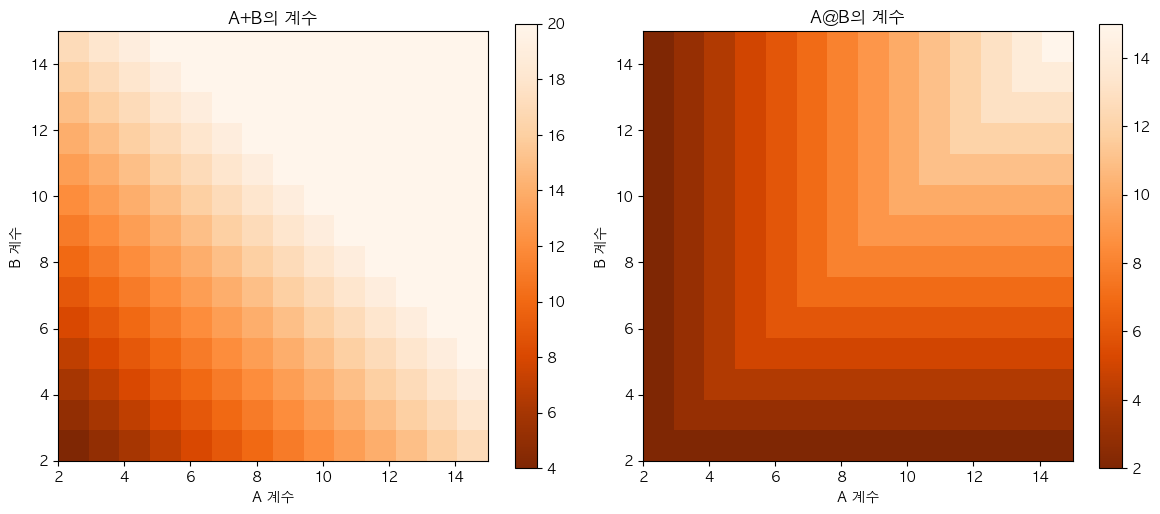

In [18]:
# Plotting

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# SUM
cax1 = axs[0].imshow(sum_ranks.T, cmap='Oranges_r', origin='lower', extent=[min_rank, max_rank, min_rank, max_rank])
axs[0].set_title('A+B의 계수')
axs[0].set_xlabel('A 계수')
axs[0].set_ylabel('B 계수')
fig.colorbar(cax1, ax=axs[0])

# MULTIPLICATION
cax2 = axs[1].imshow(product_ranks.T, cmap='Oranges_r', origin='lower', extent=[min_rank, max_rank, min_rank, max_rank])
axs[1].set_title('A@B의 계수')
axs[1].set_xlabel('A 계수')
axs[1].set_ylabel('B 계수')
fig.colorbar(cax2, ax=axs[1])

plt.tight_layout()
plt.show()

### 연습문제 5-8

In [19]:
M, N, r

(5, 7, 4)

In [20]:
print(f"""
A의 계수:\t\t{np.linalg.matrix_rank(np.random.randn(M, r) @ np.random.randn(r, N))}
AT의 계수:\t{np.linalg.matrix_rank(A.T)}
ATA의 계수:\t{np.linalg.matrix_rank(A.T @ A)}
AAT의 계수:\t{np.linalg.matrix_rank(A @ A.T)}
""")


A의 계수:		4
AT의 계수:	15
ATA의 계수:	15
AAT의 계수:	15



### 연습문제 5-9

In [21]:
# Algorithm to check is the input vector v is in col(A)

def VincolA(matrix, vector):
    
    if matrix.shape[0] != vector.shape[0]:
        raise ValueError('Error!')    # Error message
    
    rank_matrix = np.linalg.matrix_rank(matrix)
    rank_with_vector = np.linalg.matrix_rank(np.hstack((matrix, vector)))

    return rank_matrix == rank_with_vector

In [22]:
# Random matrix & vector
matA = np.random.randn(4, 3)
vecv = np.random.randn(4, 1)

VincolA(matA, vecv)

False